In [22]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
from tqdm import tqdm
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

## Data Exploration

In [2]:
train_df = pd.read_csv("train.csv")
train_df.head(10)

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5
5,004AC288D833,"Dear Principal,\r\n\r\nOur school should have ...",3.5,4.0,4.0,3.5,3.5,4.0
6,005661280443,Imagine if you could prove other people that y...,3.5,4.0,3.5,3.5,4.0,4.0
7,008DDDDD8E8D,I think it's a good idea for the estudnets to ...,2.5,2.5,2.5,2.5,2.5,2.0
8,009BCCC61C2A,positive attitude is the key to success. I agr...,3.0,3.0,3.5,3.5,3.0,3.0
9,009F4E9310CB,Asking more than one person for and advice hel...,3.0,3.0,3.5,2.5,3.0,2.5


In [3]:
len(train_df)

3911

In [5]:
print(train_df.full_text[0])

I think that students would benefit from learning at home,because they wont have to change and get up early in the morning to shower and do there hair. taking only classes helps them because at there house they'll be pay more attention. they will be comfortable at home.

The hardest part of school is getting ready. you wake up go brush your teeth and go to your closet and look at your cloths. after you think you picked a outfit u go look in the mirror and youll either not like it or you look and see a stain. Then you'll have to change. with the online classes you can wear anything and stay home and you wont need to stress about what to wear.

most students usually take showers before school. they either take it before they sleep or when they wake up. some students do both to smell good. that causes them do miss the bus and effects on there lesson time cause they come late to school. when u have online classes u wont need to miss lessons cause you can get everything set up and go take a

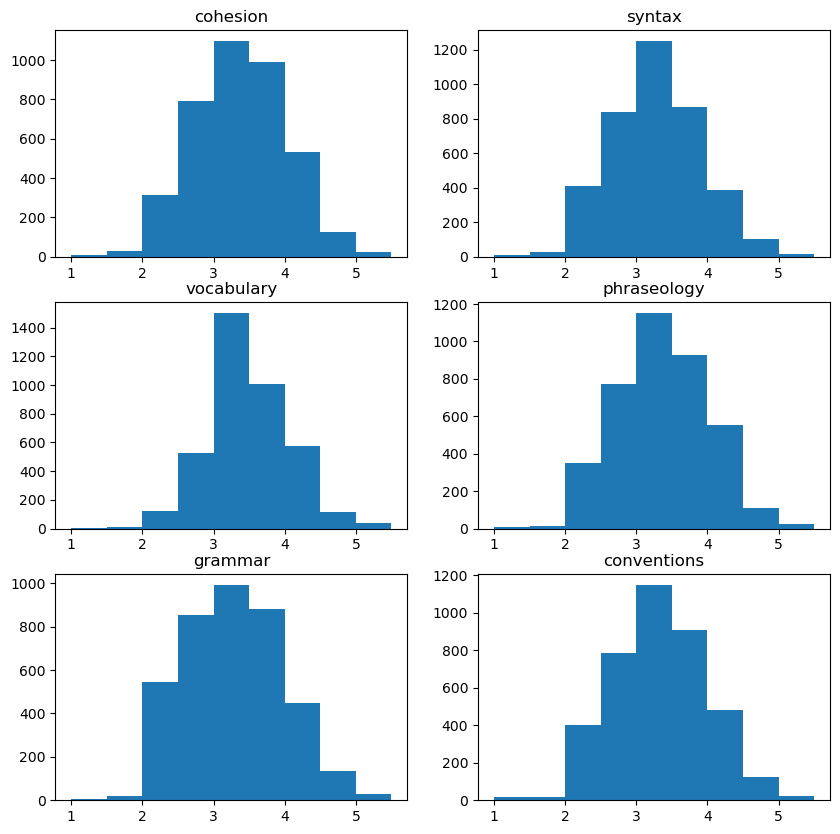

In [6]:
def visualize_dist(df):
    fig, axs = plt.subplots(3, 2)
    fig.set_size_inches(10, 10)
    bins = torch.arange(1, 6, 0.5)

    axs[0, 0].hist(df.cohesion.values, bins=bins);
    axs[0, 0].set_title('cohesion')
    axs[0, 1].hist(df.syntax.values, bins=bins);
    axs[0, 1].set_title('syntax')
    axs[1, 0].hist(df.vocabulary.values, bins=bins);
    axs[1, 0].set_title('vocabulary')
    axs[1, 1].hist(df.phraseology, bins=bins);
    axs[1, 1].set_title('phraseology')
    axs[2, 0].hist(df.grammar, bins=bins);
    axs[2, 0].set_title('grammar')
    axs[2, 1].hist(df.conventions, bins=bins);
    axs[2, 1].set_title('conventions')
    
    
visualize_dist(train_df)

In [7]:
train_df.loc[train_df['grammar'] == 1].head(5)

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions
514,2716F5E20A4F,"The students be required to take music ,drama ...",1.5,1.0,1.5,1.0,1.0,1.5
952,48EA282A4EAF,some student offer distance learning as an opt...,1.0,1.0,1.0,1.0,1.0,1.0
1528,75A20F93C2C4,i like to work with a group a cash if you work...,1.5,1.5,1.5,1.0,1.0,1.0
1540,767533E12569,he is a good because they are the prescient an...,1.0,1.0,1.0,1.0,1.0,1.0
1554,776FBF88E6FF,Welll its going to be ah good beefit but in th...,1.5,1.5,2.0,2.0,1.0,1.0


In [8]:
print(train_df.full_text[514])

The students be required to take music ,drama ,or an art class. is important all the student to this to class because is a element important for all students., also is part the education and many people, I like for the music and art. other like drama . The people dont not like, but is necessary to take this class because is big formation very important and can't be graduated learning somethings .

The class the music to help a relax , and class the drama is a part of fundamental , the class of art is more creatividad leaning some different thing ,.

The art is very good class because used to creatividad and used to things and of head practice the things.

music the arrangement of sounds made by music instruments or voice, the class the drama is example when exposed a history

I make the paper for author is draticamatica and when leaning a book after has why explicalor about the history of book.

all the class is very important because learning many things .

drama and art of the same c

In [9]:
train_df.loc[train_df['cohesion'] == 5].head(5)

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions
104,07CE77EA56C5,Students work hard there is no arguing that. T...,5.0,5.0,5.0,5.0,4.5,4.5
258,12E3D52345C6,Technology has always acted as a compelling an...,5.0,5.0,5.0,5.0,4.5,5.0
478,244973AE9715,Many people are kind and do parts in helping o...,5.0,4.5,5.0,4.5,5.0,4.0
668,33DEFCDAD05F,Technology has made a positive impact in our l...,5.0,4.0,4.0,4.5,4.0,4.0
675,3438C0C5ACEA,I oppose to extending the school day to one an...,5.0,4.0,4.0,4.5,5.0,4.5


In [10]:
train_df.corr(numeric_only=True)

,cohesion,syntax,vocabulary,phraseology,grammar,conventions
cohesion,1.000000,0.695459,0.666151,0.690058,0.638689,0.666151
syntax,0.695459,1.000000,0.680562,0.725467,0.709525,0.700025
vocabulary,0.666151,0.680562,1.000000,0.735261,0.654852,0.664292
phraseology,0.690058,0.725467,0.735261,1.000000,0.719746,0.666842
grammar,0.638689,0.709525,0.654852,0.719746,1.000000,0.673301
conventions,0.666151,0.700025,0.664292,0.666842,0.673301,1.000000


In [12]:
train_df['tokens'] = train_df.apply(lambda x: tokenizer.tokenize(x['full_text']), axis=1)
train_df["tokens_len"] = train_df.apply(lambda x: len(x["tokens"]), axis=1)

In [13]:
train_df["tokens_len"].max(), train_df["tokens_len"].min()

(1433, 14)

In [14]:
train_df.loc[train_df['tokens_len'] == 14]

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions,tokens,tokens_len
3679,F69C85F4C3CA,the memorable teacher ever had\r\n\r\nwas a te...,1.0,1.0,1.5,1.0,1.0,1.5,"[the, memorable, teacher, ever, had, was, a, t...",14


In [15]:
print(train_df.iloc[3679]["full_text"])

the memorable teacher ever had

was a teacher in 10

word

wild all students


In [57]:
train_df.corr(numeric_only=True)

,cohesion,syntax,vocabulary,phraseology,grammar,conventions,tokens_len
cohesion,1.000000,0.695459,0.666151,0.690058,0.638689,0.666151,0.218760
syntax,0.695459,1.000000,0.680562,0.725467,0.709525,0.700025,0.187874
vocabulary,0.666151,0.680562,1.000000,0.735261,0.654852,0.664292,0.268821
phraseology,0.690058,0.725467,0.735261,1.000000,0.719746,0.666842,0.210046
grammar,0.638689,0.709525,0.654852,0.719746,1.000000,0.673301,0.076464
conventions,0.666151,0.700025,0.664292,0.666842,0.673301,1.000000,0.133562
tokens_len,0.218760,0.187874,0.268821,0.210046,0.076464,0.133562,1.000000


In [25]:
train, valid = train_test_split(train_df, test_size=0.1, shuffle=True)

splits = {
 "train": train,
 "valid": valid,
}

len(train), len(valid)

(3519, 392)

In [60]:
from transformers import BertTokenizer

In [ ]:
encoded = tz.encode_plus(
    text=sent,  # the sentence to be encoded
    add_special_tokens=True,  # Add [CLS] and [SEP]
    max_length = 64,  # maximum length of a sentence
    pad_to_max_length=True,  # Add [PAD]s
    return_attention_mask = True,  # Generate the attention mask
    return_tensors = 'pt',  # ask the function to return PyTorch tensors
)

# Tokenizer

In [ ]:
from transformers import BertModel
from transformers import BertTokenizer

tz = BertTokenizer.from_pretrained("bert-base-uncased")
bert = BertModel.from_pretrained("bert-base-uncased")
bert_embed = bert.embeddings.word_embeddings

In [99]:
t = '''I like school.

Hello world.'''
enc = tz(t)
enc

{'input_ids': [101, 1045, 2066, 2082, 1012, 7592, 2088, 1012, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [100]:
tz.convert_ids_to_tokens(enc["input_ids"])

['[CLS]', 'i', 'like', 'school', '.', 'hello', 'world', '.', '[SEP]']

We can see that the tokenizer would:
- Remove newline
- Add [CLS] and [SEP] to beginning and end of text

In the context of this model where we are evaluating an essay, we don't need special tokens as they are mostly used for generative model (?)

In [103]:
t = '''I like school.

Hello world.'''
enc = tz(t, add_special_tokens=False)
tz.convert_ids_to_tokens(enc["input_ids"])

['i', 'like', 'school', '.', 'hello', 'world', '.']

In [105]:
x = ["i like school", "hello"] 
tz(x, add_special_tokens=False, padding="longest")

{'input_ids': [[1045, 2066, 2082], [7592, 0, 0]], 'token_type_ids': [[0, 0, 0], [0, 0, 0]], 'attention_mask': [[1, 1, 1], [1, 0, 0]]}

In [140]:
df = splits["train"]
serie = df.full_text.iloc[0:5]
txt = list(serie)
enc = tz(txt, add_special_tokens=False, padding="longest", return_tensors="pt")
enc

{'input_ids': tensor([[6203, 4054, 1010,  ...,    0,    0,    0],
        [1996, 2493, 4607,  ...,    0,    0,    0],
        [1996, 2224, 1997,  ..., 2279, 2154, 1012],
        [1045, 2903, 2008,  ...,    0,    0,    0],
        [2003, 2256, 2627,  ...,    0,    0,    0]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}

In [298]:
class DataFrameIterator:
    def __init__(self, df, batch_size):
        self.df = df
        self.batch_size = batch_size
        
    def __iter__(self):
        self.start = 0
        return self
    
    def __len__(self):
        last = 0 if len(self.df) % self.batch_size == 0 else 1
        return (len(self.df) // self.batch_size) + last
        
    def __next__(self):
        if self.start >= len(self.df):
            raise StopIteration()
        
        end = self.start + self.batch_size
        txt = list(self.df.full_text.iloc[self.start:end])
        enc = tz(txt, 
                 add_special_tokens=False,
                 return_tensors="pt",
                 max_length=256,
                 padding="max_length",
                 truncation=True)
        
        x = enc["input_ids"]
        y = torch.tensor(list(self.df.grammar.iloc[self.start:end])).float()
        self.start = end
        return x, y
    
    
itr = iter(DataFrameIterator(splits["train"], 32))
x, y = next(itr)
x.shape

torch.Size([32, 256])

In [299]:
len(itr)

110

## Model

In [303]:
class LSTM(nn.Module):
    
    def __init__(self, emb, hidden_size):
        super().__init__()
        vocab_size, embed_size = emb.weight.shape
        self.hidden_size = hidden_size
        
        self.emb = emb.to(torch.float64)
        self.lstm = nn.LSTM(embed_size, hidden_size, batch_first=True, dtype=torch.float64)
        self.linear = nn.Linear(hidden_size, 1, dtype=torch.float64)
        
    def forward(self, x):
        B, _, = x.shape
        emb = self.emb(x) # (B, L, emb)
        seq, (hidden, _) = self.lstm(emb) # (1, B, hidden)
        hidden = hidden.view(B, self.hidden_size) # (B, hidden)
        y = self.linear(hidden) # (B, 1)
        y = y.view(B)  # (B)
        y = y.float()
        
        return y

In [285]:
itr = iter(DataFrameIterator(splits["train"], 32))
model = LSTM(bert_embed, hidden_size=512)

In [287]:
x, y = next(itr)
yh = model(x)
yh

tensor([ 0.0017,  0.0073,  0.0019, -0.0030,  0.0036,  0.0129,  0.0004,  0.0035,
         0.0060,  0.0050,  0.0013,  0.0041,  0.0036,  0.0036,  0.0009, -0.0002,
         0.0036,  0.0062,  0.0118,  0.0002, -0.0004,  0.0060,  0.0052,  0.0017,
         0.0036,  0.0036, -0.0062,  0.0036,  0.0039,  0.0052,  0.0050,  0.0060],
       dtype=torch.float64, grad_fn=<ViewBackward0>)

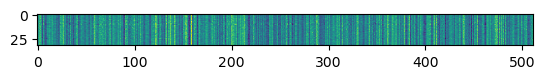

In [260]:
h = hidden.detach().numpy()
h = h * 100
plt.imshow(h)

In [261]:
y = torch.tensor([ 1.0, 2.0, 3.0, 4.0])
yh = torch.tensor([1.0, 2.1, 4.0, 6.0])

def bound_accuracy(y, yh, bound=0.5):
    dif = (y - yh).abs()
    acc = (dif <= bound).float().mean()
    return acc

bound_accuracy(y, yh, 0.5)

tensor(0.5000)

In [262]:
def r_sqr(y, yh):    
    ssr = ((yh - y)**2).sum()
    ssm = ((yh - y.mean())**2).sum()

    return 1 - ssr/ssm


y = torch.tensor([1, 2]).float()
yh = torch.tensor([1, 3]).float()
r_sqr(y, yh)

tensor(0.6000)

In [289]:
@torch.no_grad()
def eval_split(model, split):
    model.eval()
    
    df = splits[split]
    itr = DataFrameIterator(df, batch_size=32)
    
    yi = []
    yhi = []
    lossi = [] 

    for xb, yb in tqdm(itr):
        yh = model(xb)
        loss = F.mse_loss(yb, yh, reduction="mean")
        lossi.append(loss.item())
        yi += yb
        yhi += yh

    yi = torch.tensor(yi)
    yhi = torch.tensor(yhi)    
    loss = np.mean(lossi)
    r2 = r_sqr(yi, yhi)
    acc = bound_accuracy(yi, yhi, 0.5)

    return np.mean(lossi), acc, r2

In [308]:
model = LSTM(bert_embed, hidden_size=512)
opti = optim.Adam(model.parameters())
sum(p.numel() for p in model.parameters() if p.requires_grad)

26066945

In [291]:
eval_split(model, "valid")

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:05<00:00,  2.19it/s]


(9.577255947737585, tensor(0.), tensor(-0.0513, dtype=torch.float64))

In [292]:
gra_mean = train_df['grammar'].mean()

def baseline_model(x):
    B, L = x.shape
    y = torch.tensor(gra_mean)
    return y.repeat(B)

baseline_model.eval = lambda :None

In [293]:
print(eval_split(baseline_model, "valid"))

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:01<00:00,  9.00it/s]

(0.46097659267926083, tensor(0.4821), tensor(-185614.6153, dtype=torch.float64))


In [ ]:
model.train()

df = splits["train"]
itr = DataFrameIterator(df, batch_size=32)
n = len(itr)

for i, (xb, yb) in enumerate(itr):
    yh = model(xb)
    loss = F.mse_loss(yb, yh, reduction="mean")
    opti.zero_grad()
    loss.backward()
    opti.step()
    
    if i % 10 == 0:
        acc = bound_accuracy(yb, yh, 0.5)
        print(f"{i:4d}/{n:4d}: {loss.item():.4f}  {acc:.4f}")

   0/ 110: 0.6861  0.3750
  10/ 110: 0.4251  0.5000
  20/ 110: 0.5527  0.5312
  30/ 110: 0.5440  0.4688
  40/ 110: 0.5617  0.2500
  50/ 110: 0.4797  0.5000
  60/ 110: 0.4355  0.5312
  70/ 110: 0.4383  0.3750
  80/ 110: 0.5497  0.3750
  90/ 110: 0.4543  0.3750
 100/ 110: 0.4938  0.5938


In [ ]:
eval_split(model, "valid")

## Transformer

In [40]:
@dataclass
class Config:
    vocab_size: int
    block_size: int
    emb_size: int
    head_num: int
    head_size: int
    layer_num: int
    ctoi: dict
    dropout: float


class MultiHeadAttension(nn.Module):

    def __init__(self, c: Config):
        super().__init__()
        assert c.emb_size / c.head_size == c.head_num

        self.head_size = c.head_size
        self.head_num = c.head_num
        self.attn = nn.Linear(
            c.emb_size, 3 * c.head_num * c.head_size, bias=False)
        self.ffn = nn.Linear(c.head_num * c.head_size, c.emb_size, bias=False)

        self.attn_dropout = nn.Dropout(c.dropout)
        self.resid_dropout = nn.Dropout(c.dropout)

    # x: (B, L, C)
    # return: (B, L, C)
    def forward(self, x):
        B, L, C = x.shape

        z = self.attn(x)  # (B, L, 3 * hn * hs)
        k, q, v = torch.split(
            z, self.head_num * self.head_size, dim=2)  # (B, L, hn * hs)

        k = k.view(B, L, self.head_num, self.head_size).permute(
            0, 2, 1, 3)  # (B, hn, L, hs)
        q = q.view(B, L, self.head_num, self.head_size).permute(0, 2, 1, 3)
        v = v.view(B, L, self.head_num, self.head_size).permute(0, 2, 1, 3)

        q = q.permute(0, 1, 3, 2)  # (B, hn, hs, L)
        attn = (k @ q) / self.head_size**0.5  # (B, hn, L, L)
        mask = torch.tril(torch.ones(L, L)) == 0
        mask = mask.to(x.device)
        attn = attn.masked_fill(mask, -float('inf'))  # (B, hn, L, L)
        attn = F.softmax(attn, dim=3)
        attn = self.attn_dropout(attn)

        y = attn @ v  # (B, hn, L, hs)
        y = y.permute(0, 2, 1, 3)  # (B, L, hn, hs)
        y = y.contiguous().view(B, L, -1)  # (B, L, hn * hs)
        y = self.ffn(y)  # (B, L, C)
        y = self.resid_dropout(y)

        return y


class FeedForward(nn.Module):

    def __init__(self, c: Config):
        super().__init__()
        self.linear1 = nn.Linear(c.emb_size, 2 * c.emb_size)
        self.linear2 = nn.Linear(2 * c.emb_size, c.emb_size)
        self.dropout = nn.Dropout(c.dropout)

    # (B, L, C)
    def forward(self, x):
        y = self.linear1(x)
        y = torch.relu(y)
        y = self.linear2(y)
        y = self.dropout(y)

        return y


class Block(nn.Module):

    def __init__(self, c: Config):
        super().__init__()

        assert c.emb_size % c.head_size == 0
        assert c.emb_size / c.head_size == c.head_num

        self.mha = MultiHeadAttension(c)
        self.lnorm1 = nn.LayerNorm(c.emb_size)
        self.lnorm2 = nn.LayerNorm(c.emb_size)
        self.ffn = FeedForward(c)

    # x: (B, L, emb)
    def forward(self, x):
        y = self.mha(x) + x
        y = self.lnorm1(y)
        y = self.ffn(y) + y
        y = self.lnorm2(y)
        return y


class Transformer(nn.Module):

    def __init__(self, c: Config, embed):
        super().__init__()
        self.config = c
        self.embed = embed
        self.dropout = nn.Dropout(c.dropout)
        self.blocks = nn.Sequential(
            *[Block(c) for _ in range(c.layer_num)]
        )
        self.proj = nn.Linear(c.emb_size, c.vocab_size)

    # return (L, C)
    def pos_encoding(self, x):
        B, L, C = x.shape
        pos = torch.arange(0, L).view(-1, 1)  # (L, 1)
        div = 2 * torch.arange(0, C) / C  # (C)
        div = torch.pow(10000, div)  # (C)
        e = pos / div
        pe = torch.zeros(L, C)
        pe[:, 0::2] = torch.sin(e[:, 0::2])
        pe[:, 1::2] = torch.cos(e[:, 1::2])

        pe = pe.to(x.device)
        return pe

    # (B, L) -> (B, L, C)
    def forward(self, x):        
        y = self.embed(x)  # (B, L, emb)
        y = y + self.pos_encoding(y)  # (B, L, emb)
        y = self.dropout(y)
        y = self.blocks(y)  # (B, L, emb)
        y = self.proj(y)  # (B, L, vocab)

        return y

    @torch.no_grad()
    def sample(self, max_len):
        device = next(self.parameters()).device
    
        self.eval()
        itoc = {i: c for c, i in self.config.ctoi.items()}
        tks = [0] * self.config.block_size

        for i in range(max_len):
            ctx = torch.tensor(tks[i:i+self.config.block_size], device=device)  # (L)
            ctx = ctx.view(1, -1)  # (B, L)

            logits = self.forward(ctx)  # (B, L, C)
            probs = F.softmax(logits, dim=2)  # (B, L, C)
            # (C), # the last in the sequence is the newly generated
            probs = probs[0, -1, :]
            yi = torch.multinomial(probs, 1)
            tks.append(yi.item())

        tks = tks[self.config.block_size:]
        chars = [itoc.get(t, "_") for t in tks]
        self.train()
        return "".join(chars)

In [ ]:
bert_embed.weight.shape

torch.Size([30522, 768])

In [52]:
vocab_size, emb_size = bert_embed.weight.shape
config = Config(
    vocab_size=vocab_size,
    emb_size=emb_size,
    block_size=256,
    head_num=12,
    head_size=64,
    layer_num=2,
    ctoi=tokenizer.vocab,
    dropout=0
)

tf_model = Transformer(config, bert_embed)

In [53]:
tf_model.sample(10)

'whoa##riumcomfortsidewalk[unused487]films##bah##kk##olsroundabout'

# Log
validation performan, (loss, 0.5 bounded accuracy)

- Baseline: 0.4882, 0.4917
- LSTM, before training: 9.9371, 0
- LSTM, single data, 900 run: 0.5717, 0.4840
